In [19]:
import numpy as np
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten
from tensorflow.keras.layers import Flatten, concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model

In [20]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [21]:
num_labels = len(np.unique(y_train))
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [22]:
image_size = x_train.shape[1]
x_train = np.reshape(x_train, [-1, image_size, image_size, 1])
x_test = np.reshape(x_test, [-1, image_size, image_size, 1])
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [23]:
input_shape = (image_size, image_size, 1)
batch_szie = 32
kernel_size = 3
dropout = 0.4
filters = 32
dropout = 0.3

In [24]:
left_inputs = Input(shape = input_shape)
x = left_inputs
filters = filters

for i in range (3):
    x = Conv2D(filters = filters,
               kernel_size = kernel_size,
               padding = 'same',
               activation = 'relu')(x)
    x = Dropout(dropout)(x)
    x = MaxPooling2D()(x)
    filter = filters * 2

In [25]:
right_inputs = Input(shape = input_shape)
y = right_inputs
filters = filters

for i in range (3):
    y = Conv2D(filters = filters,
               kernel_size = kernel_size,
               padding = 'same',
               activation = 'relu')(y)
    y = Dropout(dropout)(y)
    y = MaxPooling2D()(y)
    filter = filters * 2

In [26]:
y = concatenate([x, y])
y = Flatten()(y)
y = Dropout(dropout)(y)
outputs = Dense(num_labels, activation = 'softmax')(y)

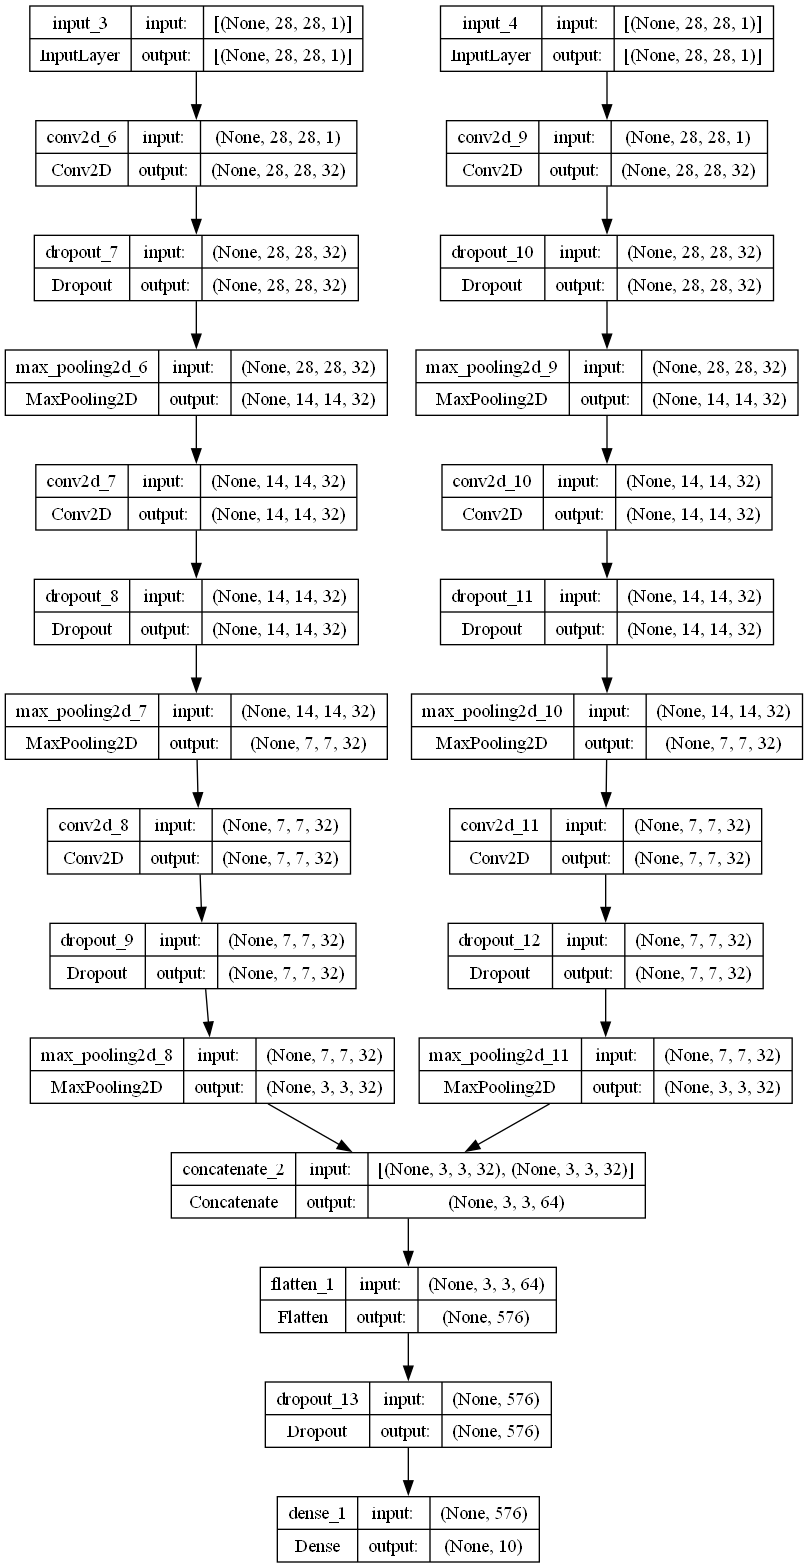

In [27]:
model = Model([left_inputs, right_inputs], outputs)
plot_model(model, to_file = 'cnn-y-network.png', show_shapes= True)

In [28]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 input_4 (InputLayer)        [(None, 28, 28, 1)]          0         []                            
                                                                                                  
 conv2d_6 (Conv2D)           (None, 28, 28, 32)           320       ['input_3[0][0]']             
                                                                                                  
 conv2d_9 (Conv2D)           (None, 28, 28, 32)           320       ['input_4[0][0]']             
                                                                                            

In [29]:
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [30]:
model.fit([x_train, x_train], y_train, validation_data = ([x_test, x_test], y_test),
          epochs = 2,
          batch_size = batch_szie)

Epoch 1/2
1875/1875 [==============================] - 44s 23ms/step - loss: 0.2384 - accuracy: 0.9233 - val_loss: 0.1436 - val_accuracy: 0.9763
Epoch 2/2
1875/1875 [==============================] - 54s 29ms/step - loss: 0.0845 - accuracy: 0.9741 - val_loss: 0.0745 - val_accuracy: 0.9881


In [37]:
score = model.evaluate([x_test, x_test], y_test,
                       batch_size = batch_szie,
                       verbose = 0)
print(f'Accuracy = {score }')

Accuracy = [0.07450290769338608, 0.988099992275238]
